# Lead Score Case Study

In [1]:
# import warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Reading the dataset

In [3]:
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# checking the shape of the data
print(f"Rows:{lead.shape[0]}")
print(f"Columns:{lead.shape[1]}")

Rows:9240
Columns:37


In [5]:
# information of the data
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# describing the data
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Data cleaning

_There is one value in most of the categorical value called as "Select" so which means that the person was not fill anything in that row , so this could be a problem ,So we are now treating the null values as "NAN"_

In [7]:
lead = lead.replace("Select",np.nan)

In [8]:
# checking for the null values
((lead.isnull().sum())/lead.shape[0])*100


Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

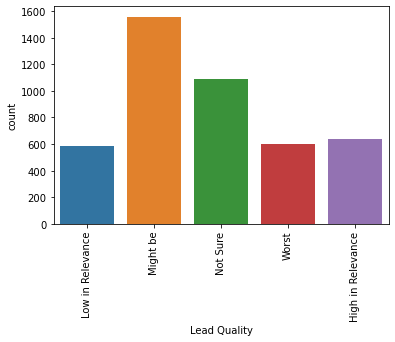

In [9]:
sns.countplot(lead["Lead Quality"])
plt.xticks(rotation=90);

In [10]:
# So "Not sure" will we the nan value so we replace "Not sure" with Nan
lead["Lead Quality"]  = lead["Lead Quality"].replace(np.nan, "Not Sure")

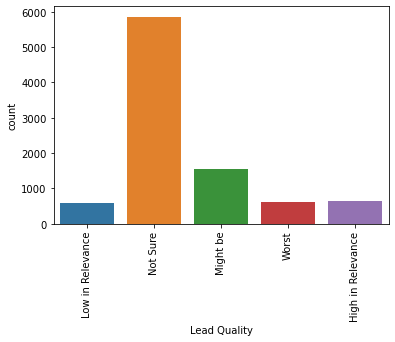

In [11]:
sns.countplot(lead["Lead Quality"])
plt.xticks(rotation=90);

In [12]:
lead["Lead Quality"].isnull().sum()

0

__Five columns have more then 40% of the null values so I will drop this column__

In [13]:
lead.drop(lead.loc[:,round(((lead.isnull().sum())/lead.shape[0])*100,2)>=40.00],axis=1,inplace=True)

In [14]:
((lead.isnull().sum())/lead.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

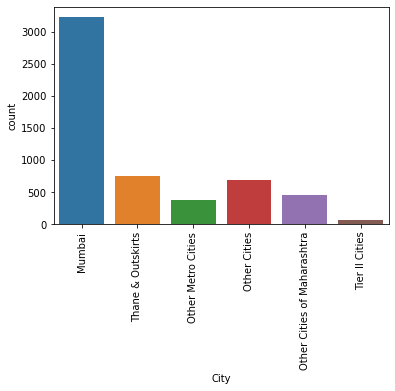

In [15]:
# now work with the 'City col'
sns.countplot(lead.City)
plt.xticks(rotation=90);

In [16]:
lead.City.value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [17]:
# Around 58% of the data is in Mumbai so we compute "Mumbai in nan values"
lead["City"]=lead["City"].replace(np.nan,"Mumbai")

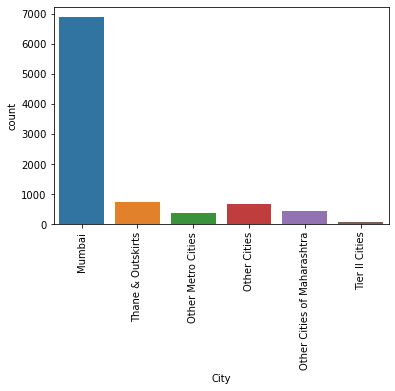

In [18]:
sns.countplot(lead["City"])
plt.xticks(rotation=90);

In [19]:
lead.City.isnull().sum()

0

_Now working on the **"specialization"** col_

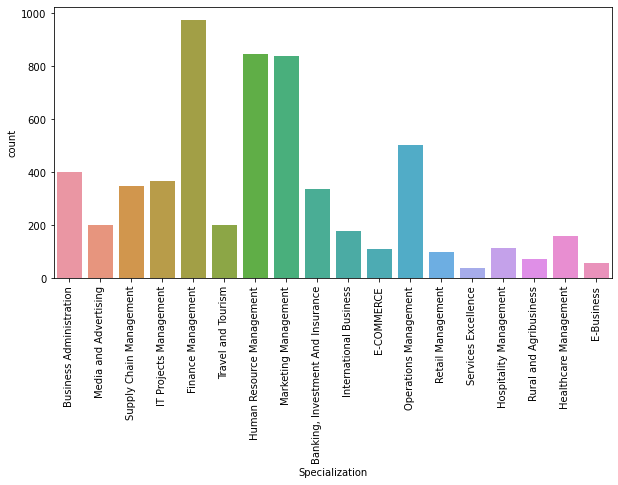

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(lead["Specialization"])
plt.xticks(rotation=90);

_It may happens that may be the lead has no entered any specialization may be becuase that specialization is not mentioned at that time, so it was filled nothing in that,
So for that we will make one more entry named as "others"_

In [21]:
lead["Specialization"]= lead["Specialization"].replace(np.nan,"Others")

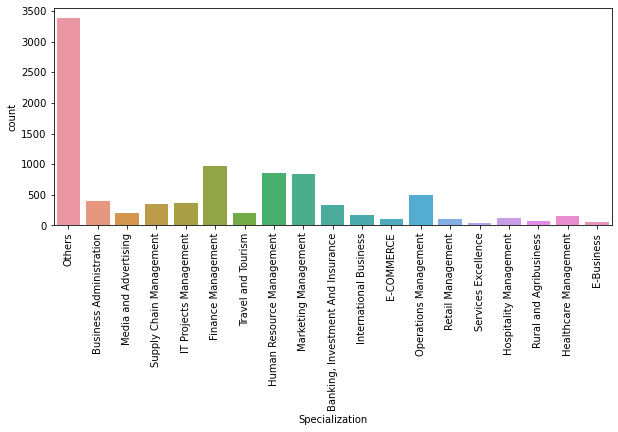

In [22]:
plt.figure(figsize=(10,4))
sns.countplot(lead["Specialization"])
plt.xticks(rotation=90);

_Now working on the "Tags" col_

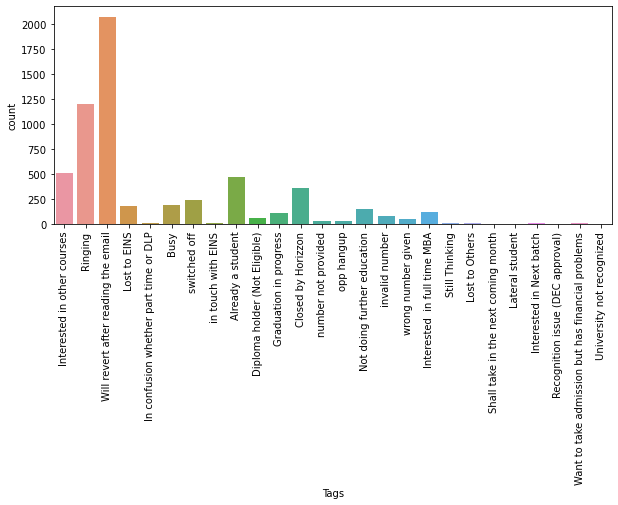

In [23]:
plt.figure(figsize=(10,4))
sns.countplot(lead["Tags"])
plt.xticks(rotation=90);

In [24]:
lead.Tags.value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [25]:
# "Will revert after reading the email " has almost 35% of the data
# So we compute this in null values
lead["Tags"] = lead["Tags"].replace(np.nan,"Will revert after reading the email")

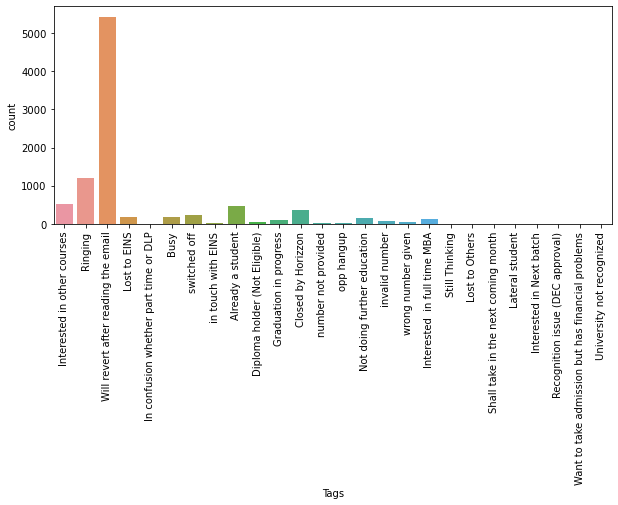

In [26]:
plt.figure(figsize=(10,4))
sns.countplot(lead["Tags"])
plt.xticks(rotation=90);

_Now working with **"What matters most to you in choosing a course"** col_

In [27]:
lead["What matters most to you in choosing a course"].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

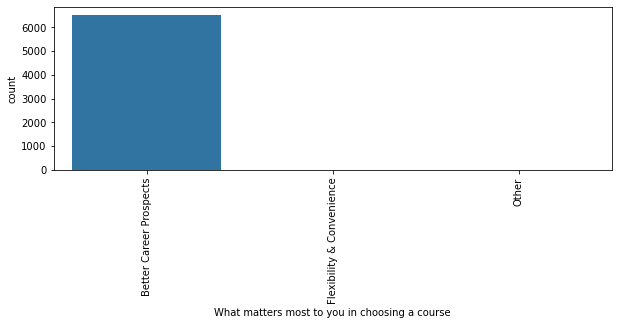

In [28]:
plt.figure(figsize=(10,3))
sns.countplot(lead["What matters most to you in choosing a course"])
plt.xticks(rotation=90);

In [29]:
# 99% of the data has the value "Better Career Prospects " 
# So we replace nan value with this
lead["What matters most to you in choosing a course"] = lead["What matters most to you in choosing a course"].replace(np.nan,"Better Career Prospects")

_Now will work with the null values of **"What is your current occupation"** columns_

In [30]:
lead["What is your current occupation"].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

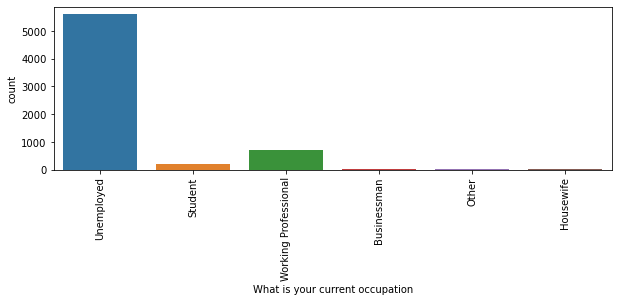

In [31]:
plt.figure(figsize=(10,3))
sns.countplot(lead["What is your current occupation"])
plt.xticks(rotation=90);

In [32]:
# 80% of the people are unemployed 
# some people didn't fill these entries 
#will impute null value with "Unemployed"

In [33]:
lead["What is your current occupation"] = lead["What is your current occupation"].replace(np.nan,"Unemployed")

_Now working with the col name **Country**_ 

In [34]:
lead["Country"].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

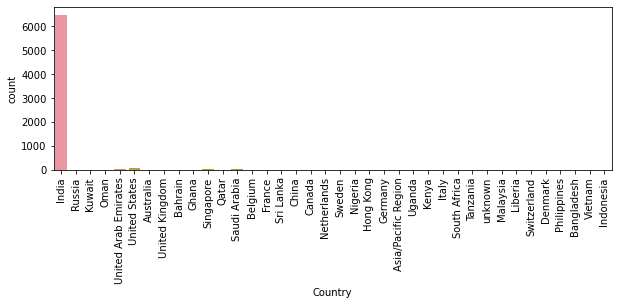

In [35]:
plt.figure(figsize=(10,3))
sns.countplot(lead["Country"])
plt.xticks(rotation=90);

In [36]:
# will impute "India" in nan values


In [37]:
lead["Country"]=lead["Country"].replace(np.nan,"India")

In [38]:
round(((lead.isnull().sum())/lead.shape[0])*100,2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [39]:
# rest missing values will drop 
lead.dropna(inplace=True)

In [40]:
lead.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                      

# EDA
#### Univariate Analysis

##### Lets check the "Coverted rate"

In [41]:
round((sum(lead["Converted"])/lead.shape[0])*100,2)

37.86

___38.54 is the converted rate___

__Lead Quality__

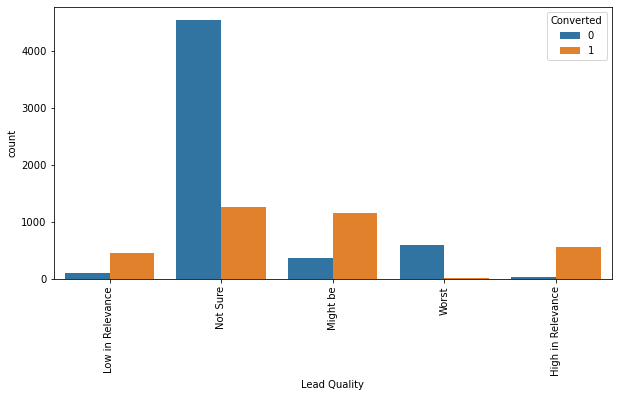

In [42]:
plt.figure(figsize=(10,5))
sns.countplot(x=lead["Lead Quality"],hue=lead["Converted"])
plt.xticks(rotation=90);

- __Inferences__
    - "Not Sure" people are high to say no but aslo giving 20% of "YES"
    - "Might be" people are high to say Yes as compare to no 
    - "High in relevance" are also  very high "yes" as compare to "NO"

#### Lead Origin

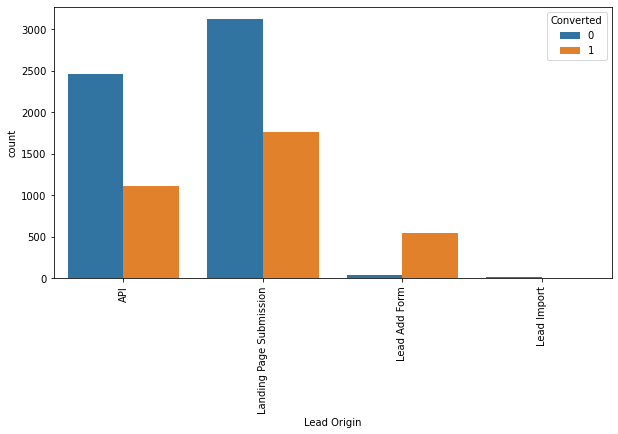

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x=lead["Lead Origin"],hue=lead["Converted"])
plt.xticks(rotation=90);

- __Inferences__
    - "API" people are high to say no but aslo giving 20% of "YES"
    - "Landing page submission" people are high to say Yes as compare to no 
    - "High in relevance" are also  very high "yes" as compare to "NO" but low as compare to other categorical values

#### Lead Sources

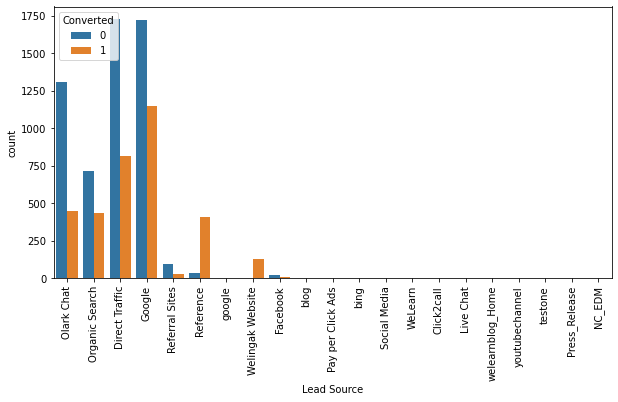

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(x=lead["Lead Source"],hue=lead["Converted"])
plt.xticks(rotation=90);

_Since many values in **lead Source** are very less in numbers so we put it into **others** category_

In [45]:
lead["Lead Source"]=lead["Lead Source"].replace("google","Google")

In [46]:
lead["Lead Source"] = lead["Lead Source"].replace(["bing","Click2call","Live Chat","Social Media","Press_Release","blog","WeLearn",
                                                  "youtubechannel","NC_EDM","Pay per Click Ads","testone","welearnblog_Home"],"Others")


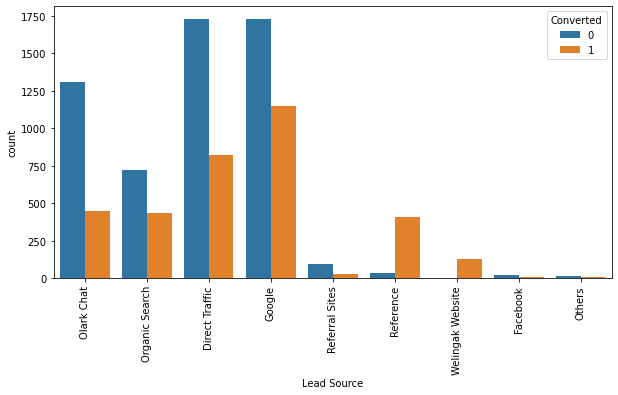

In [47]:
plt.figure(figsize=(10,5))
sns.countplot(x=lead["Lead Source"],hue=lead["Converted"])
plt.xticks(rotation=90);

##### Total visits

<AxesSubplot:ylabel='TotalVisits'>

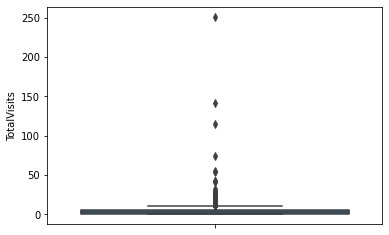

In [48]:
sns.boxplot( y=lead["TotalVisits"])

In [49]:
percentile = lead["TotalVisits"].quantile([.05,.95]).values

In [50]:
lead["TotalVisits"][lead["TotalVisits"]<=percentile[0]] = percentile[0] # total visit less than 0.0 we put 0 for all the values
lead["TotalVisits"][lead["TotalVisits"]>=percentile[1]] = percentile[1] # means that the total visits greater than 10,we are putting 10 for all the values

In [51]:
lead.TotalVisits.value_counts()

0.0     2161
2.0     1679
3.0     1306
4.0     1120
5.0      783
10.0     467
6.0      466
1.0      395
7.0      309
8.0      224
9.0      164
Name: TotalVisits, dtype: int64

In [52]:
lead["TotalVisits"][lead["TotalVisits"]>=percentile[1]]

12      10.0
56      10.0
58      10.0
59      10.0
102     10.0
        ... 
9100    10.0
9132    10.0
9138    10.0
9229    10.0
9233    10.0
Name: TotalVisits, Length: 467, dtype: float64

<AxesSubplot:xlabel='TotalVisits'>

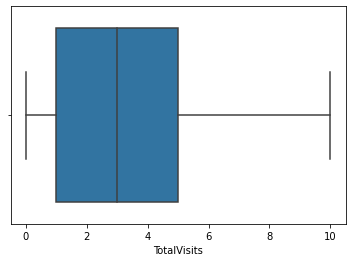

In [53]:
sns.boxplot(lead["TotalVisits"])

<AxesSubplot:xlabel='Converted', ylabel='TotalVisits'>

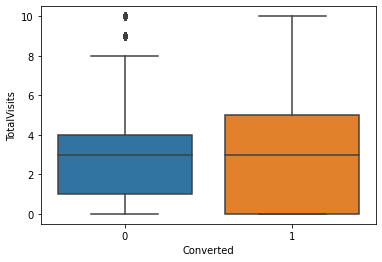

In [54]:
sns.boxplot(y= "TotalVisits",x="Converted",data=lead)

In [55]:
lead['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<AxesSubplot:ylabel='Total Time Spent on Website'>

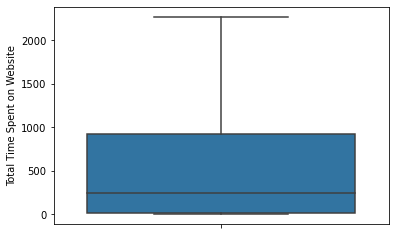

In [56]:
sns.boxplot(y=lead["Total Time Spent on Website"])

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

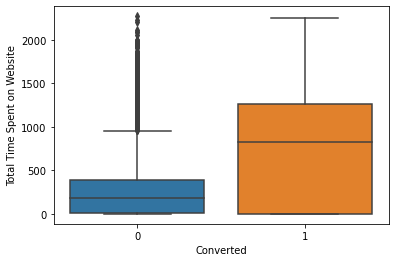

In [57]:
# 
sns.boxplot(y=lead["Total Time Spent on Website"],x = lead["Converted"])

#### Inference
- Lead spending more time on website


##### Do not email

<AxesSubplot:xlabel='Do Not Call', ylabel='count'>

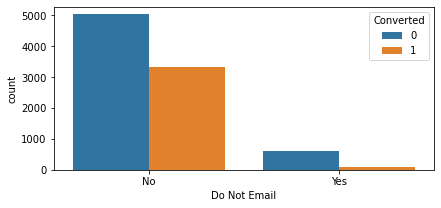

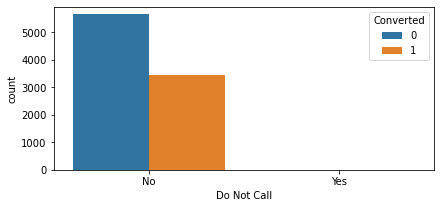

In [58]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.countplot(x="Do Not Email",hue="Converted",data=lead)


plt.figure(figsize=(15,3))
plt.subplot(1,2,2)
sns.countplot(x="Do Not Call",hue="Converted",data=lead)

#### Page Views Per Visit

In [59]:
lead["Page Views Per Visit"].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:ylabel='Page Views Per Visit'>

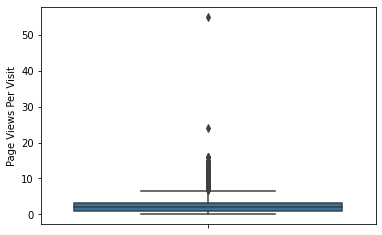

In [60]:
sns.boxplot(y=lead["Page Views Per Visit"])

In [61]:
percentile = lead["Page Views Per Visit"].quantile([0.05,.95]).values
lead["Page Views Per Visit"][lead["Page Views Per Visit"]<=percentile[0]]=percentile[0]
lead["Page Views Per Visit"][lead["Page Views Per Visit"]>=percentile[1]] = percentile[1]

<AxesSubplot:ylabel='Page Views Per Visit'>

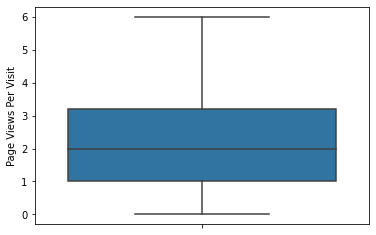

In [62]:
sns.boxplot(y=lead["Page Views Per Visit"])

In [63]:
lead["Page Views Per Visit"].describe()

count    9074.000000
mean        2.265943
std         1.790991
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max         6.000000
Name: Page Views Per Visit, dtype: float64

<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

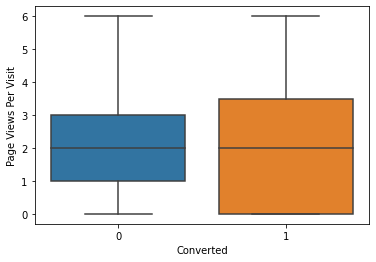

In [64]:
    sns.boxplot(y=lead["Page Views Per Visit"],x=lead["Converted"])

#### Inference
    - Median of both the "Converted" and "Non-converted" are same.
    - we can say nothin with all this data

#### Last activity

In [65]:
lead["Last Activity"].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

In [66]:
lead["Last Activity"].value_counts()

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

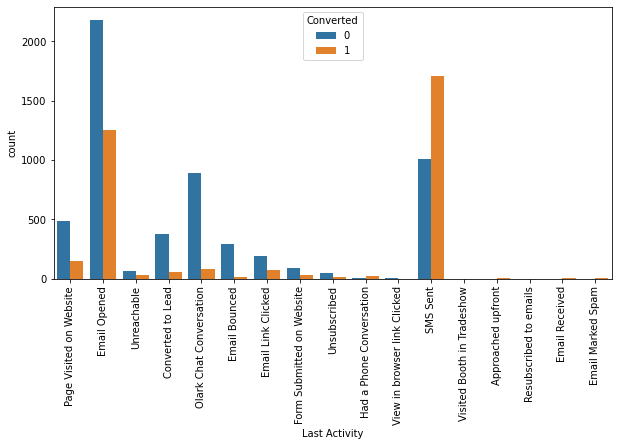

In [67]:
plt.figure(figsize=(10,5))
sns.countplot(x=lead["Last Activity"],hue=lead["Converted"])
plt.xticks(rotation=90);

_As we saw that there are many values which are less in number , So what we are doing now that we put all this to ***Others***_

In [68]:
lead["Last Activity"] = lead["Last Activity"].replace(["View in browser link Clicked","Approached upfront","Email Received",
                                                      "Email Marked Spam","Resubscribed to emails","Visited Booth in Tradeshow"
                                                      ,"Had a Phone Conversation"],"Others_Activity")

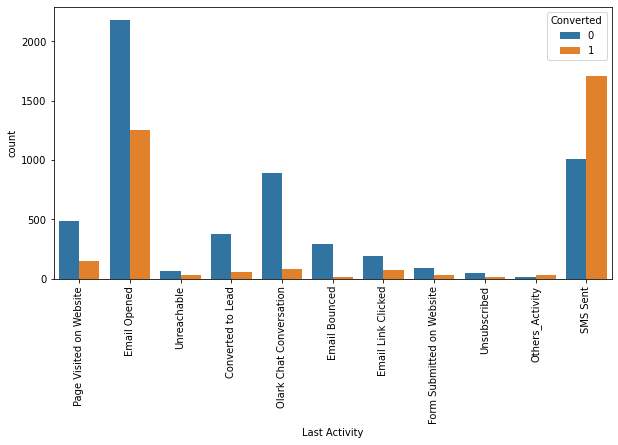

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(x=lead["Last Activity"],hue=lead["Converted"])
plt.xticks(rotation=90);

__Inferences__
- Most of the lead open Email opened as their last activity.
- Most of the lead have open the SMS and converted.

#### Country

In [70]:
lead["Country"].describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

_Most of the lead is from india,So no insights from there_

__Specialization__

In [71]:
lead["Specialization"].describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

In [72]:
lead["Specialization"].value_counts(normalize=True)*100

Others                               36.169275
Finance Management                   10.568658
Human Resource Management             9.224157
Marketing Management                  9.069870
Operations Management                 5.499229
Business Administration               4.397179
IT Projects Management                4.033502
Supply Chain Management               3.813092
Banking, Investment And Insurance     3.691867
Media and Advertising                 2.226141
Travel and Tourism                    2.226141
International Business                1.939608
Healthcare Management                 1.719198
E-COMMERCE                            1.223275
Hospitality Management                1.223275
Retail Management                     1.102050
Rural and Agribusiness                0.804496
E-Business                            0.628168
Services Excellence                   0.440820
Name: Specialization, dtype: float64

#### Tags

In [73]:
lead["Tags"].value_counts(normalize=True)*100

Will revert after reading the email                  58.882521
Ringing                                              13.081331
Interested in other courses                           5.609434
Already a student                                     5.124532
Closed by Horizzon                                    3.317170
switched off                                          2.644920
Busy                                                  2.038792
Lost to EINS                                          1.895526
Not doing further education                           1.597972
Interested  in full time MBA                          1.278378
Graduation in progress                                1.223275
invalid number                                        0.914701
Diploma holder (Not Eligible)                         0.694291
wrong number given                                    0.517963
opp hangup                                            0.363676
number not provided                                   0

In [74]:
lead['Tags'] = lead['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

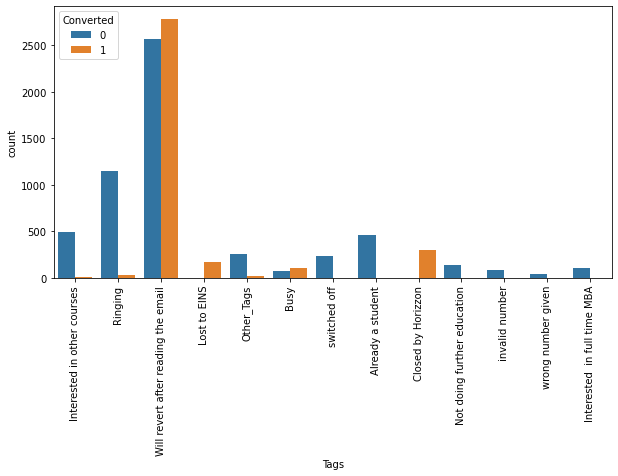

In [75]:
plt.figure(figsize=(10,5))
sns.countplot(x=lead["Tags"],hue=lead["Converted"])
plt.xticks(rotation=90);

#### inference
-  The lead which say "will revert after reading the email" has high converted percentage.

In [76]:
for i in lead.columns:
    print(i)
    print(lead[i].value_counts(normalize=True)*100)
    print("_"*100)

Prospect ID
620e6842-16c2-4e02-9580-eeca4c8de161    0.01102
e061de96-e40c-4d65-a504-745b15c787c3    0.01102
ff75ebd8-17d8-4753-a7dd-c32dae5fa34f    0.01102
d82d59c8-e2f7-4c4c-b11c-899921e8bd2f    0.01102
60f6fe47-82b0-4b05-97c8-566f1de48ff1    0.01102
                                         ...   
2137cbbf-3002-4d5c-af2c-8bfc31e448d1    0.01102
93ebb877-53f6-43cd-acc8-34890d36381e    0.01102
364920c5-3698-4882-9928-e51ede93c18c    0.01102
0f468d47-c064-455e-b8bc-74843b6a2c6a    0.01102
eec09875-4966-4955-b64b-77f0cf9397dd    0.01102
Name: Prospect ID, Length: 9074, dtype: float64
____________________________________________________________________________________________________
Lead Number
608255    0.01102
656682    0.01102
634167    0.01102
625971    0.01102
646449    0.01102
           ...   
582137    0.01102
643807    0.01102
600800    0.01102
598753    0.01102
655360    0.01102
Name: Lead Number, Length: 9074, dtype: float64
_____________________________________________________

Name: Get updates on DM Content, dtype: float64
____________________________________________________________________________________________________
City
Mumbai                         74.410403
Thane & Outskirts               8.210271
Other Cities                    7.493939
Other Cities of Maharashtra     4.915142
Other Metro Cities              4.154728
Tier II Cities                  0.815517
Name: City, dtype: float64
____________________________________________________________________________________________________
I agree to pay the amount through cheque
No    100.0
Name: I agree to pay the amount through cheque, dtype: float64
____________________________________________________________________________________________________
A free copy of Mastering The Interview
No     68.172801
Yes    31.827199
Name: A free copy of Mastering The Interview, dtype: float64
____________________________________________________________________________________________________
Last Notable Activit

### On the basis of univeriat analysis ,we have some columns which are of no use ,So we will drop this

In [77]:
col=["Prospect ID","Lead Number","What matters most to you in choosing a course","Search","Magazine","Newspaper",
     "Newspaper Article","Digital Advertisement","Through Recommendations","Receive More Updates About Our Courses",
     "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque",
     "A free copy of Mastering The Interview","Country"]
lead.drop(col,1,inplace=True)

In [78]:
lead.shape

(9074, 16)

In [79]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,X Education Forums,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No,Will revert after reading the email,Might be,Mumbai,Modified


#### Data Prepration

In [80]:
lead["Do Not Call"] = lead["Do Not Call"].apply(lambda x:1 if (x=="Yes") else 0 )
lead["Do Not Email"] = lead["Do Not Email"].apply(lambda x:1 if (x=="Yes") else 0 )
lead["X Education Forums"] = lead["X Education Forums"].apply(lambda x:1 if (x=="Yes") else 0 )

In [81]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,X Education Forums,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,Will revert after reading the email,Might be,Mumbai,Modified


__Making dummy variable for some categorical columns__

In [82]:
categorical_col = ["Lead Origin","Lead Source","Last Activity","Specialization","What is your current occupation",
                  "Tags","Lead Quality","City","Last Notable Activity"]
dummy_var = pd.get_dummies(lead[categorical_col],drop_first=True)
dummy_var.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [83]:
lead = pd.concat([lead,dummy_var],1)

In [84]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 96 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           9074 non-null   object 
 1   Lead Source                                           9074 non-null   object 
 2   Do Not Email                                          9074 non-null   int64  
 3   Do Not Call                                           9074 non-null   int64  
 4   Converted                                             9074 non-null   int64  
 5   TotalVisits                                           9074 non-null   float64
 6   Total Time Spent on Website                           9074 non-null   int64  
 7   Page Views Per Visit                                  9074 non-null   float64
 8   Last Activity                                         9074

#### As we add dummy variable now we will drop the actuall columns

In [85]:
lead.drop(categorical_col,1,inplace=True)

In [86]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 87 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9074 non-null   int64  
 1   Do Not Call                                           9074 non-null   int64  
 2   Converted                                             9074 non-null   int64  
 3   TotalVisits                                           9074 non-null   float64
 4   Total Time Spent on Website                           9074 non-null   int64  
 5   Page Views Per Visit                                  9074 non-null   float64
 6   X Education Forums                                    9074 non-null   int64  
 7   Lead Origin_Landing Page Submission                   9074 non-null   uint8  
 8   Lead Origin_Lead Add Form                             9074

#### Train-Test split

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
y=lead["Converted"] 

In [89]:
X=lead.drop(["Converted"],1)

In [90]:
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,X Education Forums,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [92]:
X_train.shape

(6351, 86)

In [93]:
y_train.shape 

(6351,)

<AxesSubplot:xlabel='Converted', ylabel='Density'>

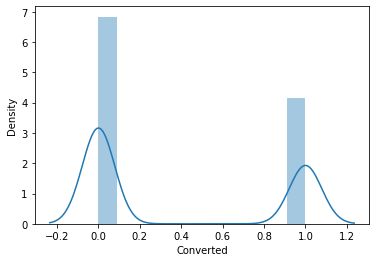

In [94]:
sns.distplot(lead["Converted"])

AS we saw that data is normally distributed ,So now we go for Standardscalor

#### Featur Scalling

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scale = StandardScaler()
X_train[["Page Views Per Visit","TotalVisits","Total Time Spent on Website"]] = scale.fit_transform(X_train[["Page Views Per Visit","TotalVisits","Total Time Spent on Website"]])



In [97]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,X Education Forums,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


**Model building**

In [98]:
import statsmodels.api as sm

In [99]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6264
Model Family:                Binomial   Df Model:                           86
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1249.8
Date:                Mon, 17 May 2021   Deviance:                       2499.6
Time:                        20:53:38   Pearson chi2:                 3.87e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### Feature scaling RFE

In [100]:
from sklearn.linear_model import LogisticRegression
logre = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logre,15)  #this is for 15 variables
rfe = rfe.fit(X_train,y_train)

In [101]:
rfe.support_

array([ True, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False])

In [102]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 33),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 38),
 ('X Education Forums', False, 44),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 41),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 42),
 ('Lead Source_Others', False, 48),
 ('Lead Source_Reference', False, 69),
 ('Lead Source_Referral Sites', False, 52),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 29),
 ('Last Activity_Email Link Clicked', False, 35),
 ('Last Activity_Email Opened', False, 67),
 ('Last Activity_Form Submitted on Website', False, 68),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Others_Activity', False, 9),
 ('Last Activity_Page Visited on Website', Fa

In [103]:
col=X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [104]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'X Education Forums',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Others_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hos

## Assessing the model with statsmodel

In [105]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
res=logm1.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.1
Date:                Mon, 17 May 2021   Deviance:                       3160.2
Time:                        20:53:55   Pearson chi2:                 3.11e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

_p-value of  feature name "Tags_invalid number " is too high so should drop this first_

In [106]:
col1 = col.drop("Tags_invalid number",1)
col1

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [107]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train[col1])), family = sm.families.Binomial())
res=logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1585.9
Date:                Mon, 17 May 2021   Deviance:                       3171.8
Time:                        20:53:55   Pearson chi2:                 3.07e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9144      0.282     -3.245      0.001      -1.467      -0.362
Do Not Email                                  -1.3129      0.211     -6.218      0.000      -1.727      -0.899
Lead Origin_Lead Add Form                      1.0839      0.365      2.969      0.003       0.368       1.800
Lead Source_Welingak Website                   3.4275      0.819      4.184      0.000       1.822       5.033
What is your current occupation_Unemployed    -1.1577      0.239     -4.848      0.000      -1.626      -0.690
Tags_Busy                                      3.7579      0.331     11.338      0.000       3.108       4.407
Tags_Closed by Horizzon                        7.9271      0.763     10.394      0.000       6.432       9.422
Tags_Lost to EINS                              9.1535      0.755     12.128      0.000       7.674      10.633
Tags_Ringing                                  -1.7229      0.339     -5.089      0.000      -2.386      -1.059
Tags_Will revert after reading the email       3.9200      0.230     17.026      0.000       3.469       4.371
Tags_switched off                             -2.3187      0.588     -3.942      0.000      -3.471      -1.166
Tags_wrong number given                      -20.8331   1.17e+04     -0.002      0.999   -2.29e+04    2.28e+04
Lead Quality_Not Sure                         -3.3174      0.129    -25.685      0.000      -3.571      -3.064
Lead Quality_Worst                            -3.9830      0.834     -4.777      0.000      -5.617      -2.349
Last Notable Activity_SMS Sent                 2.7537      0.121     22.849      0.000       2.518       2.990
==============================================================================================================
"""

_Now after droping the variable we saw that the there is another variable name as **"Tags_wrong number given"** has high p value, So we will drop this first_

In [108]:
col2= col1.drop("Tags_wrong number given",1)


In [109]:
logm3 = sm.GLM(y_train,(sm.add_constant(X_train[col2])),family=sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1587.9
Date:                Mon, 17 May 2021   Deviance:                       3175.8
Time:                        20:53:55   Pearson chi2:                 3.08e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9661      0.283     -3.417      0.001      -1.520      -0.412
Do Not Email                                  -1.3127      0.211     -6.223      0.000      -1.726      -0.899
Lead Origin_Lead Add Form                      1.0963      0.366      2.995      0.003       0.379       1.814
Lead Source_Welingak Website                   3.4147      0.820      4.166      0.000       1.808       5.021
What is your current occupation_Unemployed    -1.1746      0.240     -4.899      0.000      -1.644      -0.705
Tags_Busy                                      3.8305      0.330     11.598      0.000       3.183       4.478
Tags_Closed by Horizzon                        7.9914      0.763     10.480      0.000       6.497       9.486
Tags_Lost to EINS                              9.2178      0.755     12.217      0.000       7.739      10.697
Tags_Ringing                                  -1.6472      0.337     -4.885      0.000      -2.308      -0.986
Tags_Will revert after reading the email       3.9881      0.229     17.380      0.000       3.538       4.438
Tags_switched off                             -2.2412      0.587     -3.816      0.000      -3.392      -1.090
Lead Quality_Not Sure                         -3.3158      0.129    -25.690      0.000      -3.569      -3.063
Lead Quality_Worst                            -3.9600      0.836     -4.734      0.000      -5.599      -2.321
Last Notable Activity_SMS Sent                 2.7443      0.120     22.856      0.000       2.509       2.980
==============================================================================================================
"""

Now all the higher p-value variable are dropped ,now we go for prediction on train data set

In [110]:
y_train_pred = res.predict(sm.add_constant(X_train[col2]))
y_train_pred

3009    0.187192
1012    0.167079
9226    0.000821
4750    0.781753
7987    0.977276
          ...   
367     0.187192
82      0.953558
8199    0.036859
7077    0.013628
5754    0.004250
Length: 6351, dtype: float64

In [111]:
y_train_pred.shape

(6351,)

In [112]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([1.87191534e-01, 1.67078806e-01, 8.21369066e-04, 7.81753466e-01,
       9.77276034e-01, 9.89966304e-01, 1.87191534e-01, 7.53674840e-01,
       8.63826796e-01, 8.21369066e-04])

In [113]:
y_train_pred

array([0.18719153, 0.16707881, 0.00082137, ..., 0.03685856, 0.01362776,
       0.00425038])

### Now we Create a dataframe with the actual churn flag and the predicted probabilities

In [114]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.187192,3009
1,0,0.167079,1012
2,0,0.000821,9226
3,1,0.781753,4750
4,1,0.977276,7987


In [115]:
y_train_pred_final= y_train_pred_final[["Prospect ID","Converted_prob","Converted"]]

### Now we create new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [116]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Prospect ID,Converted_prob,Converted,predicted
0,3009,0.187192,0,0
1,1012,0.167079,0,0
2,9226,0.000821,0,0
3,4750,0.781753,1,1
4,7987,0.977276,1,1


In [117]:
from sklearn import metrics
#confusion metrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3756  149]
 [ 363 2083]]


In [118]:
# calculate overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9193827743662415


### Checking VIFs

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [120]:
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [121]:
vif

,Features,VIF
3,What is your current occupation_Unemployed,7.37
12,Last Notable Activity_SMS Sent,4.05
8,Tags_Will revert after reading the email,4.02
7,Tags_Ringing,1.86
1,Lead Origin_Lead Add Form,1.58
2,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.25
10,Lead Quality_Not Sure,1.17
4,Tags_Busy,1.15
0,Do Not Email,1.11


#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

### Metrics 

In [122]:
TP=confusion[1,1]
TN=confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [123]:
## calculate sensitivity 
TP/float(TP+FN)

0.8515944399018807

In [124]:
# calculate specificity
TN/float(TN+FP)

0.9618437900128041

In [125]:
# Calculate false postive rate
FP/ float(TN+FP)

0.038156209987195905

In [126]:
# calculate positive predictive value 
TP / float(TP+FP)

0.9332437275985663

In [127]:
# calculate Negative predictive value
TN / float(TN+ FN)

0.9118718135469774

###  ROC Curve


In [128]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

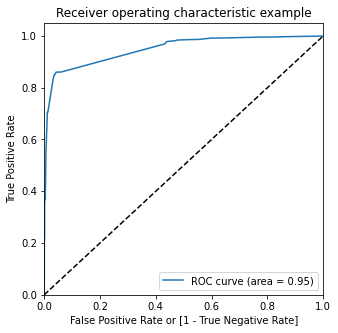

In [129]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)



### Finding Optimal Cutoff Point



Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

In [130]:
#  create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Prospect ID,Converted_prob,Converted,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,3009,0.187192,0,0,1,1,0,0,0,0,0,0,0,0
1,1012,0.167079,0,0,1,1,0,0,0,0,0,0,0,0
2,9226,0.000821,0,0,1,0,0,0,0,0,0,0,0,0
3,4750,0.781753,1,1,1,1,1,1,1,1,1,1,0,0
4,7987,0.977276,1,1,1,1,1,1,1,1,1,1,1,1


In [131]:
#  calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.385136     1.000000     0.000000
0.1          0.1  0.705086     0.981603     0.531882
0.2          0.2  0.909148     0.860589     0.939565
0.3          0.3  0.920013     0.859771     0.957746
0.4          0.4  0.919855     0.858953     0.958003
0.5          0.5  0.919383     0.851594     0.961844
0.6          0.6  0.920170     0.851594     0.963124
0.7          0.7  0.919383     0.845462     0.965685
0.8          0.8  0.878917     0.706868     0.986684
0.9          0.9  0.818769     0.538839     0.994110


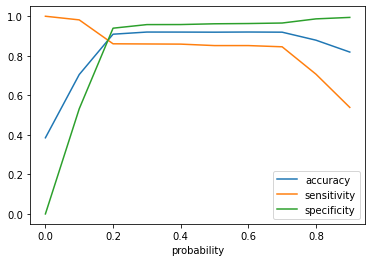

In [132]:
#  plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

In [133]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)
y_train_pred_final.head()

,Prospect ID,Converted_prob,Converted,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,3009,0.187192,0,0,1,1,0,0,0,0,0,0,0,0,0
1,1012,0.167079,0,0,1,1,0,0,0,0,0,0,0,0,0
2,9226,0.000821,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4750,0.781753,1,1,1,1,1,1,1,1,1,1,0,0,1
4,7987,0.977276,1,1,1,1,1,1,1,1,1,1,1,1,1


### Assign Lead Score

In [134]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Prospect ID,Converted_prob,Converted,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,3009,0.187192,0,0,1,1,0,0,0,0,0,0,0,0,0,19
1,1012,0.167079,0,0,1,1,0,0,0,0,0,0,0,0,0,17
2,9226,0.000821,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,4750,0.781753,1,1,1,1,1,1,1,1,1,1,0,0,1,78
4,7987,0.977276,1,1,1,1,1,1,1,1,1,1,1,1,1,98


In [135]:
#calculate overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [169]:
# lets check the accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)


0.9091481656432058

In [136]:
# calculate sensitivity 
TP / float(TP+FN)

0.8605887162714636

In [137]:
#calculate specificity
TN / float(TN+FP)

0.9395646606914213

In [138]:
# Calculate false postive rate
FP/ float(TN+FP)

0.060435339308578744

In [139]:
# calculate Positive predictive value 
TP / float(TP+FP)

0.8991883810337462

In [140]:
# calculate Negative predictive value
TN / float(TN+ FN)

0.9149625935162095

### Precision and Recall

In [141]:
##Looking at the confusion matrix 

In [142]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3756,  149],
       [ 363, 2083]], dtype=int64)

###  Precision
TP / (TP + FP)

In [143]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9332437275985663

### Recall

TP / (TP+FN)

In [144]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8515944399018807

In [145]:
from sklearn.metrics import precision_score, recall_score

In [146]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.9332437275985663

In [147]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8515944399018807

## Precision and recall 

In [148]:
from sklearn.metrics import precision_recall_curve

In [149]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [150]:
a, b, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

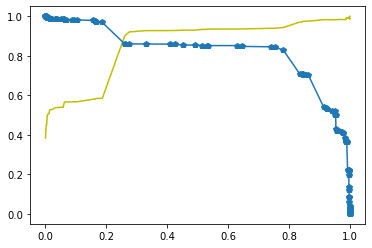

In [151]:
plt.plot(thresholds, a[:-1], "y-")
plt.plot(thresholds, b[:-1], "p-")
plt.show()

### Making predictions on the test set

In [152]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,X Education Forums,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [153]:
X_test = X_test[col2]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,1,0,0,0,0,1,0,1,0,0
1490,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,0,0,1,0,0,0,0,1,0,1,0,0
4216,0,1,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,1,0,0,0,0,1,0,1,0,0


In [154]:
X_test_sm = sm.add_constant(X_test)

### Now we are doing prediction on Test set 

In [155]:
y_test_pred = res.predict(X_test_sm)

In [156]:
y_test_pred[:10]

3271    0.187192
1490    0.953558
7936    0.187192
4216    0.999703
3830    0.187192
1800    0.953558
6507    0.012624
4821    0.000454
4223    0.996625
4714    0.187192
dtype: float64

In [157]:
# Converting y_pred to a dataframe 
y_pred_1 = pd.DataFrame(y_test_pred)

In [158]:
y_pred_1.head()

,0
3271,0.187192
1490,0.953558
7936,0.187192
4216,0.999703
3830,0.187192


In [159]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [160]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final["Prospect ID"] = y_pred_final.index



In [161]:
y_pred_final=y_pred_final.rename(columns={0:"Converted_prob"})

In [162]:
y_pred_final.reset_index(drop=True,inplace=True)
y_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.187192,3271
1,1,0.953558,1490
2,0,0.187192,7936
3,1,0.999703,4216
4,0,0.187192,3830


In [163]:
y_pred_final= y_pred_final[["Prospect ID","Converted_prob","Converted"]]

In [164]:
y_pred_final.head()

,Prospect ID,Converted_prob,Converted
0,3271,0.187192,0
1,1490,0.953558,1
2,7936,0.187192,0
3,4216,0.999703,1
4,3830,0.187192,0


In [165]:
y_pred_final['final_predicted'] = y_pred_final.Converted.map(lambda x: 1 if x > 0.2 else 0)

y_pred_final.head()

,Prospect ID,Converted_prob,Converted,final_predicted
0,3271,0.187192,0,0
1,1490,0.953558,1,1
2,7936,0.187192,0,0
3,4216,0.999703,1,1
4,3830,0.187192,0,0


In [166]:
# calculate overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

1.0

In [167]:
# calculate sensitivity 
TP / float(TP+FN)

0.8605887162714636

In [168]:
# calculate specificity
TN / float(TN+FP)

0.9395646606914213

In [171]:
# top colunms
col2

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')